## Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов


In [346]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [347]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import seaborn as sns
import glob
from hmmlearn.hmm import GaussianHMM

In [242]:
read_files = glob.glob("*.txt")
read_files

['alice_en.txt',
 'alice_ru.txt',
 'book.txt',
 'tom_1.txt',
 'tom_2.txt',
 'tom_3.txt',
 'tom_4.txt']

In [243]:
files = ['tom_1.txt',
 'tom_2.txt',
 'tom_3.txt',
 'tom_4.txt']

In [295]:
with open('book.txt', 'w') as book:
    for i in files:
        with open(i, 'r', encoding='UTF-8') as f:
            book.write(f.read())
book.close()

In [296]:
with open('book.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-яё ]','', text)

In [297]:
# определяем алфавит
alphabet = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '

# создаем словарь соответствия буквы и ее позиции в алфавите
position = {w: p for p, w in enumerate(alphabet)}

In [298]:
# задаем матрицу вероятностей перехода букв (по деволту нули, потом будем добавлять значения)
probabilities = np.zeros((len(alphabet), len(alphabet)))

In [299]:
# делаем счетчик количества встречающихся пар букв в тексте (то есть по парных переходов)
for i, j in zip(text[:-1], text[1:]):
    probabilities[position[i], position[j]] += 1

In [300]:
# считаем вероятность перехода по строчно (1 строка как буква А переходит во все другие буквы и тд виз по матрице)
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [301]:
# переводим матрицу в датафрейм
df = pd.DataFrame(probabilities, index=(c for c in alphabet), columns=(c for c in alphabet))

In [305]:
df.columns

Index(['а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м',
       'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ',
       'ы', 'ь', 'э', 'ю', 'я', ' '],
      dtype='object')

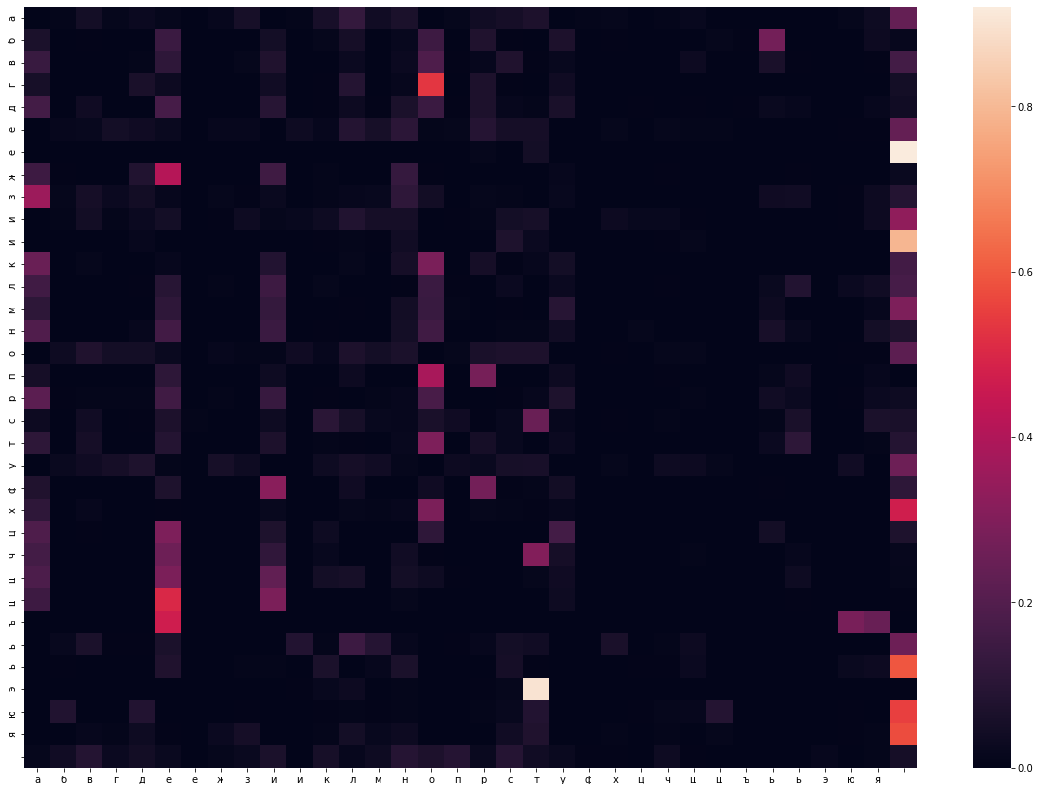

In [316]:
plt.figure(figsize=(20,14))
sns.heatmap(df, 
            xticklabels=['а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м',
       'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ',
       'ы', 'ь', 'э', 'ю', 'я', ''],
            yticklabels=['а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м',
       'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ',
       'ы', 'ь', 'э', 'ю', 'я', ''])

In [294]:
start = position['п']
end = position['р']
prior = 1. / len(alphabet)
for c in alphabet:
    for j in alphabet:
        proba = prior * probabilities[start, position[c]] * probabilities[position[c], position[j]] * probabilities[position[j], end]
        if proba > 0:
            print(''.join(['п', c, j, 'р']), proba)

паар 2.5207649190691473e-07
пабр 2.2100055338680835e-06
павр 2.2364248211760067e-06
пагр 2.0368560468806e-06
падр 4.2978568154563506e-06
паер 3.275180970536732e-06
пажр 1.5489702095157818e-08
пазр 1.6416824160245962e-06
паир 5.580705698205104e-07
пайр 4.894280194377402e-07
пакр 6.697282476458556e-06
палр 1.0139942820946131e-06
памр 6.44836073686209e-07
панр 4.1933000945591e-07
паор 1.948642054928766e-06
папр 1.522862715316372e-05
парр 8.429879570147815e-08
паср 9.870793534017992e-07
патр 6.812875845405612e-06
паур 3.3316088886209546e-07
пафр 3.917027805184137e-06
пахр 6.096567064423558e-07
пацр 4.296453469702874e-09
пачр 6.49649110891118e-08
пашр 1.7194566520466948e-08
пащр 7.2033459260607656e-09
паэр 3.758078821070711e-08
паюр 4.970424322646765e-07
паяр 8.588254847156067e-07
пбар 3.1236073795011473e-09
пббр 6.854825415865303e-11
пбвр 1.2860882177591123e-10
пбгр 5.5132992762454695e-11
пбдр 1.222421202605786e-10
пбер 1.4130040614324587e-08
пбёр 1.6270448400651633e-12
пбжр 2.787366812684

пыцр 4.685268834468403e-10
пычр 1.3817485808359793e-08
пышр 6.091192245050051e-09
пыщр 1.1510900568207176e-10
пыэр 6.643307487966196e-09
пыюр 2.2831515851309967e-10
пыяр 1.3070900682073347e-08
пьар 1.2721385606283491e-06
пьбр 2.0283098675798364e-06
пьвр 1.5912585865310524e-06
пьгр 1.2063997933463359e-06
пьдр 2.01897994971228e-06
пьер 1.1555481468846437e-05
пьёр 1.652206930831365e-09
пьжр 2.304813867248007e-09
пьзр 4.38505339812816e-07
пьир 1.111592699541215e-06
пьйр 8.643770485190502e-10
пькр 6.78344853904187e-06
пьлр 4.700443508204837e-08
пьмр 3.028608214422734e-07
пьнр 3.957765416616399e-07
пьор 3.3372319344626663e-06
пьпр 1.6890577606044506e-05
пьрр 1.6121455161362836e-08
пьср 1.056921110086417e-06
пьтр 1.895768034677558e-06
пьур 3.9253937716690325e-07
пьфр 6.201593568265915e-07
пьхр 1.3175604476841194e-07
пьцр 1.1469462314351135e-08
пьчр 7.161166271209078e-08
пьшр 1.938915167869273e-08
пьщр 9.402427107374327e-10
пьэр 7.014826384118375e-08
пьюр 8.117827779715205e-07
пьяр 5.906182201

Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [326]:
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = position[s[i]]
    next_char = np.random.choice(list(alphabet), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

богдупре


- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [398]:
series = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')['Count']

In [399]:
values = series.values.reshape(-1, 1)

Fitting a model with 119 free scalar parameters with only 77 data points will result in a degenerate solution.


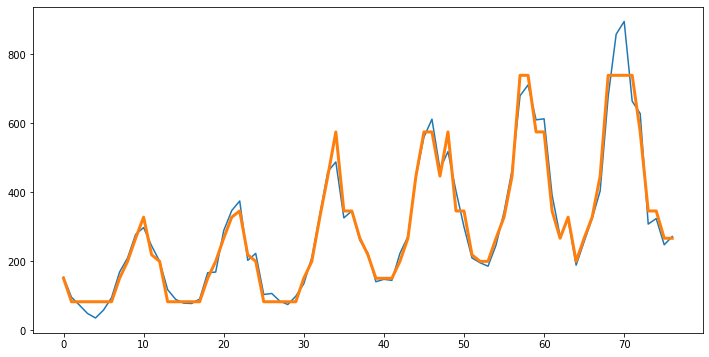

In [400]:
# model = GaussianHMM(n_components=10,
#                         covariance_type="diag",
#                         n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [372]:
model.predict(values)

array([1, 6, 6, 6, 6, 6, 6, 1, 4, 0, 9, 8, 4, 6, 6, 6, 6, 6, 1, 4, 0, 9,
       3, 8, 4, 6, 6, 6, 6, 6, 1, 4, 9, 7, 2, 3, 3, 0, 8, 1, 1, 1, 4, 0,
       7, 2, 2, 7, 2, 3, 3, 8, 4, 4, 0, 9, 7, 5, 5, 2, 2, 3, 0, 9, 4, 0,
       9, 7, 5, 5, 5, 5, 2, 3, 3, 0, 0])

In [408]:
num_samples = 10
samples, _ = model.sample(num_samples)

In [409]:
samples

array([[143.4836169 ],
       [145.1121614 ],
       [140.27242593],
       [191.57368239],
       [259.33545765],
       [332.47265007],
       [456.66719217],
       [640.61646008],
       [389.50995128],
       [190.26316114]])

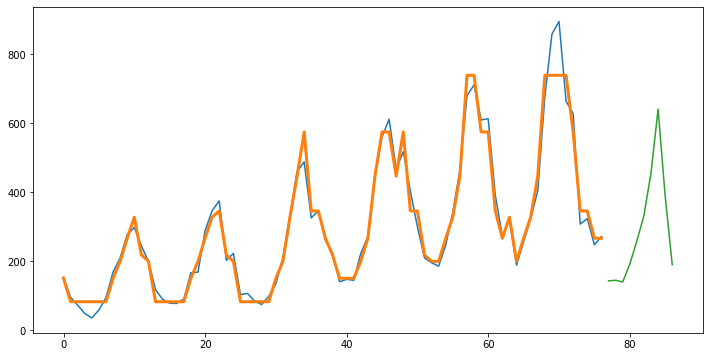

In [410]:
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.plot([77, 78,79,80,81,82,83,84,85,86], samples)

### Практика

In [71]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import seaborn as sns

In [29]:
with open('alice_ru.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-яё]','', text)

#### Матрица вероятностей перехода от одной буквы к другой

In [197]:
# определяем алфавит
alphabet = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'

# создаем словарь соответствия буквы и ее позиции в алфавите
position = {w: p for p, w in enumerate(alphabet)}

In [64]:
# задаем матрицу вероятностей перехода букв (по деволту нули, потом будем добавлять значения)
probabilities = np.zeros((len(alphabet), len(alphabet)))

In [65]:
# делаем счетчик количества встречающихся пар букв в тексте (то есть по парных переходов)
for i, j in zip(text[:-1], text[1:]):
    probabilities[position[i], position[j]] += 1

In [66]:
# считаем вероятность перехода по строчно (1 строка как буква А переходит во все другие буквы и тд виз по матрице)
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [68]:
# переводим матрицу в датафрейм
df = pd.DataFrame(probabilities, index=(c for c in alphabet), columns=(c for c in alphabet))

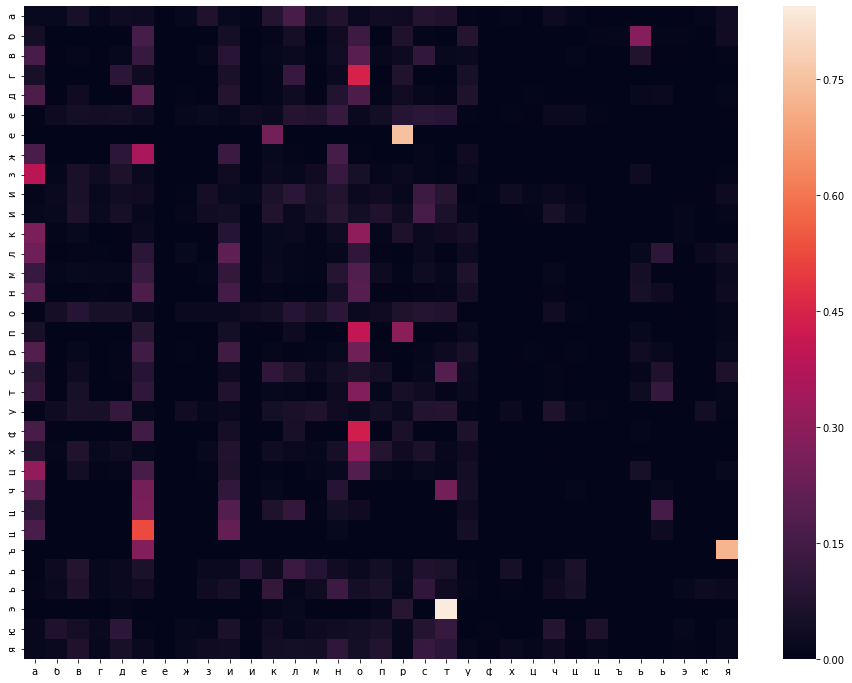

In [74]:
plt.figure(figsize=(16,12))
sns.heatmap(df)

#### Вероятность слова в тексте

In [102]:
string = "дом"
proba = 1.0 / 33
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities[position[cp], position[cn]]
print(proba)

0.00029845239654724594


#### Генерация строк из выборки

In [223]:
s = []
start = np.random.choice(list(alphabet))
s.append(start)
length = 4
for i in range(length):
    index = position[s[i]]
    next_char = np.random.choice(list(alphabet), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

цаска


In [222]:
df.iloc[2, :]

а    0.158832
б    0.003856
в    0.009916
г    0.005692
д    0.013772
е    0.125230
ё    0.000000
ж    0.001102
з    0.013588
и    0.091994
й    0.000000
к    0.014873
л    0.021300
м    0.008814
н    0.037275
о    0.194822
п    0.014322
р    0.027360
с    0.109805
т    0.018913
у    0.020749
ф    0.001285
х    0.001102
ц    0.000918
ч    0.003122
ш    0.010650
щ    0.000000
ъ    0.000000
ы    0.074183
ь    0.004040
э    0.004223
ю    0.000184
я    0.008079
Name: в, dtype: float64

In [201]:
position[s[1]]

IndexError: list index out of range

In [196]:
s

['ё']

In [175]:
np.choose()

['ю', 'о', 'н', 'а', 'с']

In [150]:
for i in range(length):
    print(i)

0
1
2
3


In [186]:
s = 'л'

In [187]:
index = position[s[0]]

In [188]:
index

12

In [192]:
probabilities[index].max()

0.44668587896253603

In [170]:
np.random.choice(list(alphabet), p=probabilities[2])

'е'

In [189]:
df.iloc[12, :].sort_values()

щ    0.000000
й    0.000000
ф    0.000000
ъ    0.000000
ё    0.000129
ц    0.000129
х    0.000258
з    0.001032
э    0.001161
р    0.001806
т    0.003097
б    0.003871
д    0.004000
ш    0.005290
ч    0.006581
в    0.006710
п    0.008258
м    0.008903
г    0.009161
л    0.011742
н    0.014194
ж    0.016516
к    0.016774
ы    0.019484
ю    0.020000
с    0.020516
у    0.028774
я    0.042323
е    0.096387
ь    0.102065
о    0.107355
и    0.205290
а    0.238194
Name: л, dtype: float64

In [ ]:
налал